In [1]:
import numpy as np

# Define the grid world
grid_world = np.array([
    [0,  0,  0,  10],
    [0, -1,  0,   0],
    [0,  0,  0,   0],
    [1,  0,  0,   5]
])

# Define the possible actions
actions = ['up', 'down', 'left', 'right']

# Define the state transition dynamics
def get_next_state(state, action):
    x, y = state
    if action == 'up':
        next_state = (max(x-1, 0), y)
    elif action == 'down':
        next_state = (min(x+1, 3), y)
    elif action == 'left':
        next_state = (x, max(y-1, 0))
    elif action == 'right':
        next_state = (x, min(y+1, 3))
    return next_state if grid_world[next_state] != -1 else state


In [2]:
# Initialize value function
V = np.zeros((4, 4))
policy = np.random.choice(actions, size=(4, 4))

# Define the discount factor
gamma = 0.9

# Policy Evaluation
def policy_evaluation(policy, V, gamma=0.9, theta=1e-6):
    while True:
        delta = 0
        for i in range(4):
            for j in range(4):
                v = V[i, j]
                next_state = get_next_state((i, j), policy[i, j])
                V[i, j] = grid_world[i, j] + gamma * V[next_state]
                delta = max(delta, abs(v - V[i, j]))
        if delta < theta:
            break
    return V

# Policy Improvement
def policy_improvement(V, gamma=0.9):
    policy_stable = True
    for i in range(4):
        for j in range(4):
            old_action = policy[i, j]
            action_values = []
            for action in actions:
                next_state = get_next_state((i, j), action)
                action_values.append(grid_world[i, j] + gamma * V[next_state])
            best_action = actions[np.argmax(action_values)]
            policy[i, j] = best_action
            if old_action != best_action:
                policy_stable = False
    return policy, policy_stable

# Policy Iteration
def policy_iteration(V, policy, gamma=0.9):
    while True:
        V = policy_evaluation(policy, V, gamma)
        policy, policy_stable = policy_improvement(V, gamma)
        if policy_stable:
            break
    return V, policy

# Compute the optimal value function and policy
V_optimal, policy_optimal = policy_iteration(V, policy, gamma)


In [3]:
def print_policy(policy):
    policy_symbols = {
        'up': '↑',
        'down': '↓',
        'left': '←',
        'right': '→'
    }
    for i in range(4):
        for j in range(4):
            print(policy_symbols[policy[i, j]], end=' ')
        print()

print("Optimal Policy:")
print_policy(policy_optimal)


Optimal Policy:
→ → → ↑ 
↑ → → ↑ 
→ → → ↑ 
→ → → ↑ 


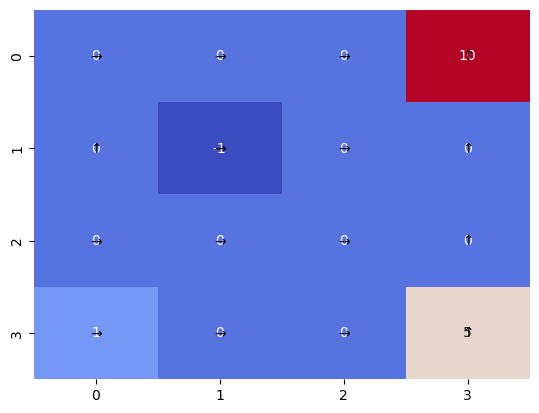

Agent's Path: [(0, 0), (0, 1), (0, 2), (0, 3)]


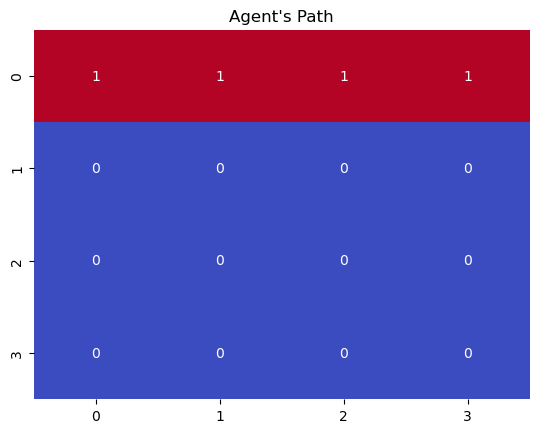

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_policy(grid, policy):
    policy_symbols = {
        'up': '↑',
        'down': '↓',
        'left': '←',
        'right': '→'
    }
    fig, ax = plt.subplots()
    sns.heatmap(grid, annot=True, fmt='d', cmap='coolwarm', cbar=False, ax=ax)
    for i in range(4):
        for j in range(4):
            ax.text(j+0.5, i+0.5, policy_symbols[policy[i, j]], 
                    ha='center', va='center', color='black')
    plt.show()

def simulate_agent(policy, start_state=(0, 0)):
    state = start_state
    path = [state]
    while grid_world[state] == 0:
        state = get_next_state(state, policy[state])
        path.append(state)
    return path

# Visualize the optimal policy
visualize_policy(grid_world, policy_optimal)

# Simulate and visualize the agent's path
agent_path = simulate_agent(policy_optimal)
print("Agent's Path:", agent_path)

# Visualize the path on the grid
path_grid = np.zeros_like(grid_world)
for state in agent_path:
    path_grid[state] = 1

sns.heatmap(path_grid, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title("Agent's Path")
plt.show()
